In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.signal import butter, lfilter

### Import data

In [ ]:
X_128 = pd.read_csv("Dataset/X_128.csv")
map_128 = pd.read_csv("Dataset/map_128.csv")
spk_map_128 = pd.read_csv("Dataset/spk_map_128.csv")
y_128 = pd.read_csv("Dataset/y_128.csv")

In [ ]:
X_128.drop(columns="Unnamed: 0", inplace=True)
map_128.drop(columns="Unnamed: 0", inplace=True)
spk_map_128.drop(columns="Unnamed: 0", inplace=True)
y_128.drop(columns="Unnamed: 0", inplace=True)

In [ ]:
X_128 = X_128.to_numpy()
map_128 = map_128.to_numpy()
spk_map_128 = spk_map_128.to_numpy()
y_128 = y_128.to_numpy()

### Remove signals with many consecutive zeros

In [ ]:
def find_consecutive_zeros(X, max=20):
    indexes = []
    for index, row in enumerate(X):
        max_length = 0
        temp_length = 0
        for col in np.arange(len(row)):
            if row[col] == 0:
                temp_length+=1
            else:
                temp_length = 0
            if temp_length > max_length:
                max_length = temp_length
        if max_length > max:
            indexes.append(index)
    return indexes

In [ ]:
drop_indexes = find_consecutive_zeros(X_128)
print(len(drop_indexes))

3172


In [ ]:
X_128 = np.delete(X_128, drop_indexes, axis=0)
map_128 = np.delete(map_128, drop_indexes, axis=0)
spk_map_128 = np.delete(spk_map_128, drop_indexes, axis=0)
y_128 = np.delete(y_128, drop_indexes, axis=0)

In [ ]:
X_128.shape, map_128.shape, spk_map_128.shape, y_128.shape

((67729, 100), (67729, 1), (67729, 1), (67729, 1))

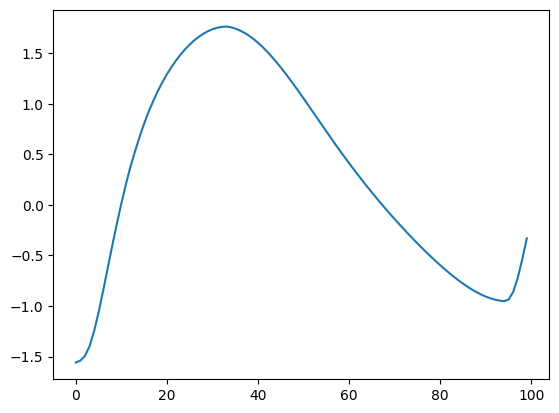

In [ ]:
plt.plot(X_128[560])

### Apply filter

In [ ]:
# Apply a chebychev II filter of order 4 to each signal
def filter_signal(signal_ppg, fs=128, lowcut=0.1, highcut=7):
    # Define the filter parameters (from the Chebyshev filter)

    nyquist_freq = 0.5 * fs          # Nyquist frequency in Hz
    low = lowcut / nyquist_freq      # Low cut frequency in Hz
    high = highcut / nyquist_freq    # High cut frequency in Hz

    order = 3  # Filter order

    #Create filter for the signal
    b, a = butter(order, [low, high], btype="band")

    # Apply the filter to the signal
    y = lfilter(b, a, signal_ppg)

    return y

In [ ]:
X_128 = np.apply_along_axis(filter_signal, 1, X_128)
X_128.shape

(67729, 100)

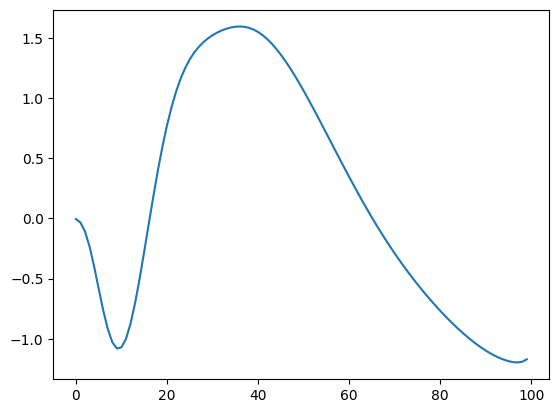

In [ ]:
plt.plot(X_128[560])

### Normalize data

In [ ]:
scaler = MinMaxScaler()
X_128 = scaler.fit_transform(X_128.T).T

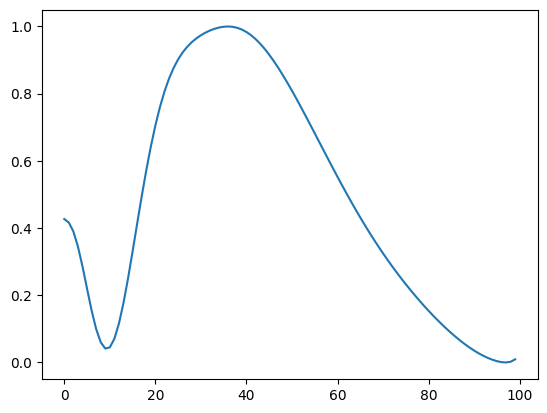

In [ ]:
plt.plot(X_128[560])

### Kurtosis and skewness analysis

In [ ]:
from math import sqrt
def kurtosis(beat):
    """
        @description: compute the kurtosis statistics of a vector of real values
        @params: a vector of real values
    """
    N = len(beat)
    mean = np.mean(beat)

    differences = 0
    for i in range(N):
        differences += (beat[i]-mean)**4

    k = (differences/N)/((differences/N)**2)

    return k

def skewness(beat):
    """
        @description: compute the skewness statistics of a vector of real values
        @params: a vector of real values
    """
    N = len(beat)
    mean = np.mean(beat)

    differences_num = 0
    for i in range(N):
        differences_num += (beat[i]-mean)**3

    differences_den = 0
    for i in range(N):
        differences_den += (beat[i]-mean)**2

    k = (differences_num/N)/((sqrt(differences_den/N))**3)

    return k

In [ ]:
X_128_kurtosis = np.apply_along_axis(kurtosis, 1, X_128)
X_128_skewness = np.apply_along_axis(skewness, 1, X_128)

In [ ]:
X_128_skewness[560]

0.1468015409073297

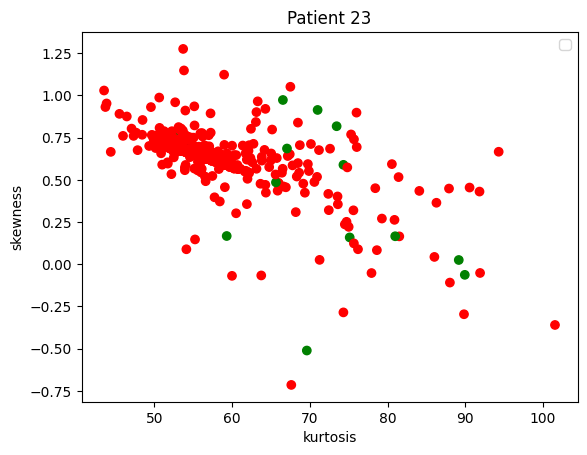

In [ ]:
patient_id = 23
patient_ids = np.where(map_128 == patient_id)[0]
colors= ['red' if l == 'N' else 'green' for l in y_128[patient_ids]]
plt.scatter(X_128_kurtosis[patient_ids], X_128_skewness[patient_ids], c=colors)
plt.xlabel('kurtosis')
plt.ylabel('skewness')
plt.title('Patient '+str(patient_id))
plt.legend()
plt.show()

In [ ]:
np.unique(map_128, return_counts=True)

In [ ]:
def calculate_difference(data):
    differences = [data[i] - data[i - 1] for i in range(1, len(data))]
    return differences

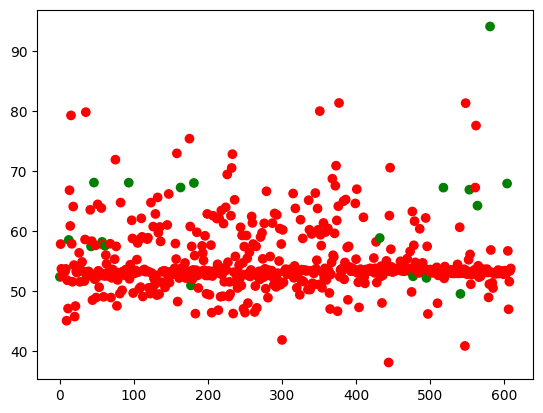

In [ ]:
plt.scatter(np.arange(len(patient_ids)), X_128_kurtosis[patient_ids], c=colors)

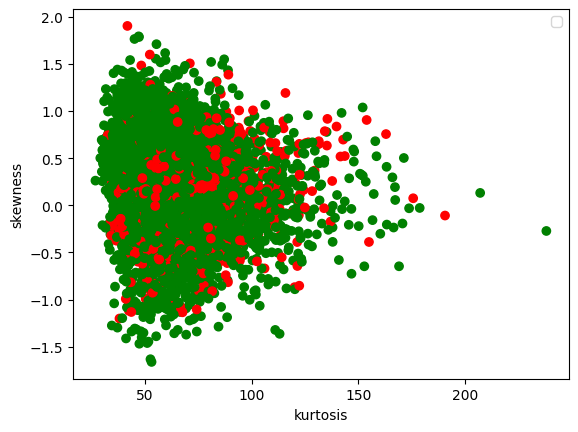

In [ ]:
# Plot them all together
colors= ['green' if l == 'N' else 'red' for l in y_128]
plt.scatter(X_128_kurtosis, X_128_skewness, c=colors)
plt.xlabel('kurtosis')
plt.ylabel('skewness')
plt.legend()
plt.show()